In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
simple_data=pd.read_csv('/content/PS_20174392719_1491204439457_log.csv')

In [3]:
pd.options.display.float_format ='{:,.3f}'.format

In [4]:
simple_data.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.640",C1231006815,"170,136.000","160,296.360",M1979787155,0.000,0.000,0.000,0.000
1,1,PAYMENT,"1,864.280",C1666544295,"21,249.000","19,384.720",M2044282225,0.000,0.000,0.000,0.000
2,1,TRANSFER,181.000,C1305486145,181.000,0.000,C553264065,0.000,0.000,1.000,0.000
3,1,CASH_OUT,181.000,C840083671,181.000,0.000,C38997010,"21,182.000",0.000,1.000,0.000
4,1,PAYMENT,"11,668.140",C2048537720,"41,554.000","29,885.860",M1230701703,0.000,0.000,0.000,0.000
5,1,PAYMENT,"7,817.710",C90045638,"53,860.000","46,042.290",M573487274,0.000,0.000,0.000,0.000
6,1,PAYMENT,"7,107.770",C154988899,"183,195.000","176,087.230",M408069119,0.000,0.000,0.000,0.000
7,1,PAYMENT,"7,861.640",C1912850431,"176,087.230","168,225.590",M633326333,0.000,0.000,0.000,0.000
8,1,PAYMENT,"4,024.360",C1265012928,"2,671.000",0.000,M1176932104,0.000,0.000,0.000,0.000
9,1,DEBIT,"5,337.770",C712410124,"41,720.000","36,382.230",C195600860,"41,898.000","40,348.790",0.000,0.000


In [4]:
simple_data.shape

(409488, 11)

In [6]:
simple_data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [7]:
simple_data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud           float64
isFlaggedFraud    float64
dtype: object

In [8]:
simple_data.isnull().count()

step              179014
type              179014
amount            179014
nameOrig          179014
oldbalanceOrg     179014
newbalanceOrig    179014
nameDest          179014
oldbalanceDest    179014
newbalanceDest    179014
isFraud           179014
isFlaggedFraud    179014
dtype: int64

In [9]:
simple_data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"179,014.000","179,014.000","179,013.000","179,013.000","179,013.000","179,013.000","179,013.000","179,013.000"
mean,9.739,"180,132.007","891,585.583","908,948.807","927,260.512","1,188,119.676",0.001,0.000
std,1.999,"333,582.840","2,814,422.818","2,851,533.831","2,374,230.006","2,676,058.743",0.028,0.000
min,1.000,0.320,0.000,0.000,0.000,0.000,0.000,0.000
25%,9.000,"11,669.417",0.000,0.000,0.000,0.000,0.000,0.000
50%,10.000,"65,668.175","19,762.000",0.000,"42,338.600","116,334.500",0.000,0.000
75%,11.000,"226,839.212","193,554.090","227,679.790","729,856.100","1,166,437.530",0.000,0.000
max,12.000,"10,000,000.000","38,939,424.030","38,946,233.020","39,039,582.050","39,042,481.250",1.000,0.000


CASH_OUT    1743141
PAYMENT     1660897
CASH_IN     1079634
TRANSFER     408649
DEBIT         31065
Name: type, dtype: int64


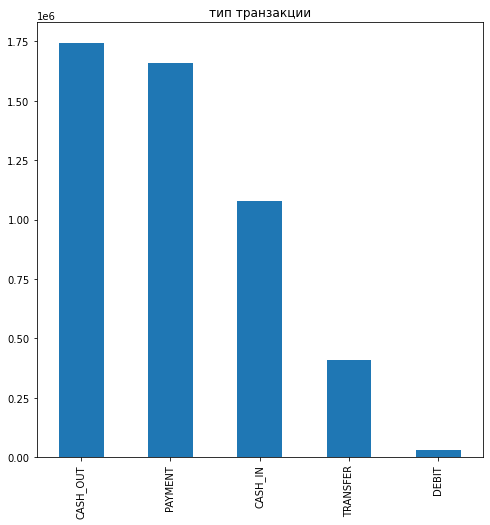

In [ ]:
print(simple_data.type.value_counts())

f, ax = plt.subplots(1, 1, figsize=(8, 8))
simple_data.type.value_counts().plot(kind='bar', title="тип транзакции", ax=ax, figsize=(8,8))
plt.show()

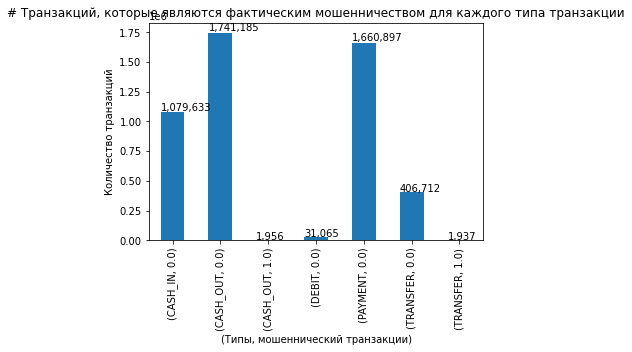

In [ ]:
ax = simple_data.groupby(['type', 'isFraud']).size().plot(kind='bar')
ax.set_title("# Транзакций, которые являются фактическим мошенничеством для каждого типа транзакции")
ax.set_xlabel("(Типы, мошеннический транзакции)")
ax.set_ylabel("Количество транзакций")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

In [ ]:
from statsmodels.tools import categorical
tmp = simple_data.loc[(simple_data['type'].isin(['TRANSFER', 'CASH_OUT'])),:]
tmp.drop(['step', 'nameOrig', 'nameDest', 'isFlaggedFraud'], axis=1, inplace=True)
tmp = tmp.reset_index(drop=True)
a = np.array(tmp['type'])
b = categorical(a, drop=True)
tmp['type_num'] = b.argmax(1)

print(tmp.head(3))

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/tools.py:162: FutureWarning: categorical is deprecated. Use pandas Categorical to represent categorical data and can get_dummies to construct dummy arrays. It will be removed after release 0.13.
  FutureWarning


       type      amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0  TRANSFER     181.000        181.000           0.000           0.000   
1  CASH_OUT     181.000        181.000           0.000      21,182.000   
2  CASH_OUT 229,133.940     15,325.000           0.000       5,083.000   

   newbalanceDest  isFraud  type_num  
0           0.000    1.000         1  
1           0.000    1.000         0  
2      51,513.440    0.000         0  


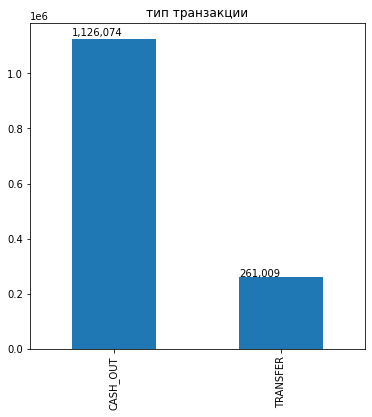

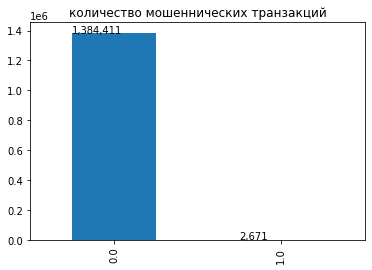

In [ ]:
ax = tmp.type.value_counts().plot(kind='bar', title="тип транзакции", figsize=(6,6))
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()*1.01))

plt.show()

ax = pd.value_counts(tmp['isFraud'], sort = True).sort_index().plot(kind='bar', title="количество мошеннических транзакций")
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x(), p.get_height()))
    
plt.show()

In [5]:
simple_data.drop('nameOrig',axis=1, inplace=True)
simple_data.drop('nameDest',axis=1, inplace=True)

In [ ]:
simple_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.640","170,136.000","160,296.360",0.000,0.000,0.000,0.000
1,1,PAYMENT,"1,864.280","21,249.000","19,384.720",0.000,0.000,0.000,0.000
2,1,TRANSFER,181.000,181.000,0.000,0.000,0.000,1.000,0.000
3,1,CASH_OUT,181.000,181.000,0.000,"21,182.000",0.000,1.000,0.000
4,1,PAYMENT,"11,668.140","41,554.000","29,885.860",0.000,0.000,0.000,0.000


In [6]:
simple_data['type'].value_counts()

CASH_OUT    147466
PAYMENT     136704
CASH_IN      88583
TRANSFER     33801
DEBIT         2933
CASH_            1
Name: type, dtype: int64

In [7]:
type_new={'CASH_OUT':0,'PAYMENT':1,'CASH_IN':2,'TRANSFER':3,'DEBIT':4}
simple_data['type_new']=simple_data['type'].map(type_new)

In [8]:
simple_data.drop('type',axis=1,inplace=True)

In [9]:
simple_data.isna().sum()

step              0
amount            1
oldbalanceOrg     1
newbalanceOrig    1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
type_new          1
dtype: int64

In [10]:
simple_data=simple_data.dropna()

In [16]:
simple_data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_new
0,1,"9,839.640","170,136.000","160,296.360",0.000,0.000,0.000,0.000,1
1,1,"1,864.280","21,249.000","19,384.720",0.000,0.000,0.000,0.000,1
2,1,181.000,181.000,0.000,0.000,0.000,1.000,0.000,3
3,1,181.000,181.000,0.000,"21,182.000",0.000,1.000,0.000,0
4,1,"11,668.140","41,554.000","29,885.860",0.000,0.000,0.000,0.000,1


In [11]:
y=simple_data['isFraud']
simple_data.drop('isFraud',axis=1,inplace=True)

In [12]:
x=simple_data

In [13]:
y.head()

0   0.000
1   0.000
2   1.000
3   1.000
4   0.000
Name: isFraud, dtype: float64

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train)

StandardScaler()

In [16]:
x_train_std = pd.DataFrame(scaler.transform(x_train), columns=x_train.columns)
x_train_std

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_new
0,-1.176,0.319,-0.242,-0.158,-0.231,-0.426,0.000,0.973
1,-1.176,-0.567,-0.305,-0.307,-0.420,-0.465,0.000,-0.043
2,0.661,-0.573,-0.305,-0.307,-0.420,-0.465,0.000,-0.043
3,0.355,-0.482,0.589,0.586,-0.245,-0.453,0.000,0.973
4,0.661,0.447,-0.305,-0.307,0.254,0.319,0.000,-1.059
...,...,...,...,...,...,...,...,...
327584,0.661,1.295,-0.231,-0.307,-0.052,0.089,0.000,-1.059
327585,1.580,-0.256,-0.223,-0.260,0.622,0.537,0.000,-1.059
327586,0.661,-0.354,-0.305,-0.307,-0.342,-0.365,0.000,-1.059
327587,-0.564,-0.585,-0.305,-0.307,-0.420,-0.465,0.000,-0.043


In [ ]:
x_train_std.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_new
count,"99,564.000","99,564.000","99,564.000","99,564.000","99,564.000","99,564.000","99,564.000","99,564.000"
mean,-0.000,0.000,-0.000,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000
min,-4.253,-0.513,-0.317,-0.318,-0.377,-0.432,0.000,-1.121
25%,-0.493,-0.483,-0.317,-0.318,-0.377,-0.432,0.000,-1.121
50%,0.044,-0.347,-0.310,-0.318,-0.366,-0.404,0.000,-0.089
75%,0.581,0.116,-0.249,-0.242,-0.109,-0.032,0.000,0.942
max,1.118,28.387,13.335,13.162,13.882,13.746,0.000,3.005


In [17]:
x_test_std = pd.DataFrame(scaler.transform(x_test), columns=x_train.columns)

In [ ]:
x_train_std.dtypes

step              float64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud    float64
type_new          float64
dtype: object

In [18]:
y_train.value_counts()

0.000    327432
1.000       157
Name: isFraud, dtype: int64

In [ ]:
#x_train_std = x_train_std[np.isfinite(x_train_std).all(1)]
#x_train_std.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,type_new
count,"2,524,070.000","2,524,070.000","2,524,070.000","2,524,070.000","2,524,070.000","2,524,070.000","2,524,070.000","2,524,070.000"
mean,-0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
std,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000
min,-1.647,-0.591,-0.289,-0.293,-0.433,-0.463,-0.001,-1.067
25%,-1.148,-0.544,-0.289,-0.293,-0.433,-0.463,-0.001,-1.067
50%,0.324,-0.305,-0.284,-0.293,-0.373,-0.368,-0.001,-0.047
75%,0.772,0.201,-0.251,-0.241,-0.022,0.011,-0.001,0.973
max,1.374,36.841,13.122,12.954,18.108,17.347,"1,588.732",3.013


In [19]:
len(x_train_std)

327589

In [20]:
len(y_train)

327589

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score,recall_score
clfLogReg=LogisticRegression()
clfLogReg.fit(x_train_std,y_train)

LogisticRegression()

In [22]:
predLogReg=clfLogReg.predict(x_train_std)
precision_score(y_train,predLogReg)

0.9166666666666666

In [23]:
recall_score(y_train,predLogReg)

0.07006369426751592

In [ ]:
predLogRegTest=clfLogReg.predict(x_test_std)
precision_score(y_test,predLogRegTest)

0.6666666666666666

In [ ]:
recall_score(y_test,predLogRegTest)

0.08333333333333333

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clfKNN = KNeighborsClassifier()
clfKNN.fit(x_train_std,y_train)
predKNN=clfKNN.predict(x_train_std)

In [ ]:
precision_score(y_train,predKNN)

0.8461538461538461

In [ ]:
recall_score(y_train,predKNN)

0.1437908496732026

С помощью градиентного бустнига




In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
dictionary=dict({
    'n_estimators':range(10,150,10),
    'max_depth':range(5,15,2)
})

In [ ]:
clfGB=GradientBoostingClassifier(learning_rate=0.03)
search=GridSearchCV(clfGB,dictionary,cv=5)
search.fit(x_train,y_train)
best_model=search.best_estimator_

In [ ]:
#clfGB.fit(x_train_std,y_train)

GradientBoostingClassifier(learning_rate=0.03, max_depth=10, n_estimators=50)

С помощью нейросети

In [24]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import metrics
from keras.optimizers import Adam
from keras import backend as K

In [25]:
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_train_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [26]:
y_test_cat=to_categorical(y_test)
y_test_cat

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [27]:
xNN=x_train_std.to_numpy()
xNN

array([[-1.17614091,  0.31914343, -0.24173389, ..., -0.42638375,
         0.        ,  0.97287804],
       [-1.17614091, -0.56725895, -0.30454297, ..., -0.46520977,
         0.        , -0.04295091],
       [ 0.66130284, -0.57274965, -0.30454297, ..., -0.46520977,
         0.        , -0.04295091],
       ...,
       [ 0.66130284, -0.35444801, -0.30454297, ..., -0.3651316 ,
         0.        , -1.05877987],
       [-0.56365966, -0.58471811, -0.30454297, ..., -0.46520977,
         0.        , -0.04295091],
       [-0.56365966,  0.8503554 , -0.29366646, ..., -0.16616529,
         0.        ,  0.97287804]])

In [28]:
xNN_test=x_test_std.to_numpy()
xNN_test

array([[ 1.27378409,  0.05557181, -0.24436506, ..., -0.39087869,
         0.        , -1.05877987],
       [ 1.58002472,  2.42378058, -0.30454297, ...,  2.21176842,
         0.        ,  1.988707  ],
       [-1.17614091, -0.21097364, -0.29751836, ..., -0.46520977,
         0.        ,  0.97287804],
       ...,
       [-0.25741903, -0.49584859, -0.28721855, ..., -0.46520977,
         0.        , -0.04295091],
       [ 0.96754347,  0.43697312, -0.29322964, ..., -0.46520977,
         0.        ,  0.97287804],
       [-1.17614091, -0.59244395,  0.46520151, ..., -0.46520977,
         0.        , -0.04295091]])

In [29]:
xNN.shape

(327589, 8)

In [30]:
y_train_cat.shape

(327589, 2)

In [31]:
from keras.layers.serialization import activation
model_new=keras.Sequential([
    Dense(6,activation='relu',input_shape=(8,)),
    Dense(4,activation='relu'),
    Dense(2,activation='tanh')
])
model_new.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 54        
                                                                 
 dense_1 (Dense)             (None, 4)                 28        
                                                                 
 dense_2 (Dense)             (None, 2)                 10        
                                                                 
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________


In [32]:
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [33]:
myOpt=keras.optimizers.Adam(learning_rate=0.001)
myLoss=keras.losses.BinaryCrossentropy()
#myMetrics=keras.metrics.Precision()

model_new.compile(loss=myLoss,
                  optimizer=myOpt,
                  metrics=[f1_m,precision_m, recall_m])          

In [34]:
hope=model_new.fit(xNN, y_train_cat, epochs=10, validation_split=0.2)

Epoch 1/10
8190/8190 [==============================] - 33s 4ms/step - loss: 0.0209 - f1_m: 0.9919 - precision_m: 0.9960 - recall_m: 0.9899 - val_loss: 0.0047 - val_f1_m: 0.9996 - val_precision_m: 0.9996 - val_recall_m: 0.9996
Epoch 2/10
8190/8190 [==============================] - 29s 4ms/step - loss: 0.0061 - f1_m: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - val_loss: 0.0040 - val_f1_m: 0.9996 - val_precision_m: 0.9996 - val_recall_m: 0.9996
Epoch 3/10
8190/8190 [==============================] - 28s 3ms/step - loss: 0.0057 - f1_m: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - val_loss: 0.0039 - val_f1_m: 0.9997 - val_precision_m: 0.9997 - val_recall_m: 0.9996
Epoch 4/10
8190/8190 [==============================] - 29s 4ms/step - loss: 0.0055 - f1_m: 0.9995 - precision_m: 0.9995 - recall_m: 0.9995 - val_loss: 0.0038 - val_f1_m: 0.9997 - val_precision_m: 0.9997 - val_recall_m: 0.9996
Epoch 5/10
8190/8190 [==============================] - 29s 4ms/step - loss: 0.0055 - f1_m: 

In [35]:
loss, f1_score, precision, recall = model_new.evaluate(xNN_test, y_test_cat, verbose=0)

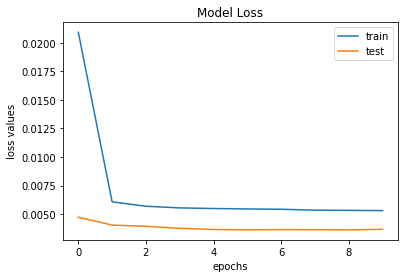

In [36]:
plt.plot(hope.history['loss'], label='train')
plt.plot(hope.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('epochs')
plt.ylabel('loss values')
plt.legend(loc='upper right')
plt.show()